# 1 Generating Random Networks

In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## 1. Create random networks using Erdös-Rényi (ER) model

(a) Create an undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbi- trary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions. `What distribution is observed? Explain why. Also, report the mean and variance of the degree distributions and compare them to the theoretical values`.

When prob is 0.003000:The mean is 2.922000 and the variance is 2.778695
When prob is 0.004000:The mean is 3.932000 and the variance is 3.614991
When prob is 0.010000:The mean is 9.900000 and the variance is 9.691692
When prob is 0.050000:The mean is 49.608000 and the variance is 45.059395
When prob is 1.000000:The mean is 999.000000 and the variance is 0.000000


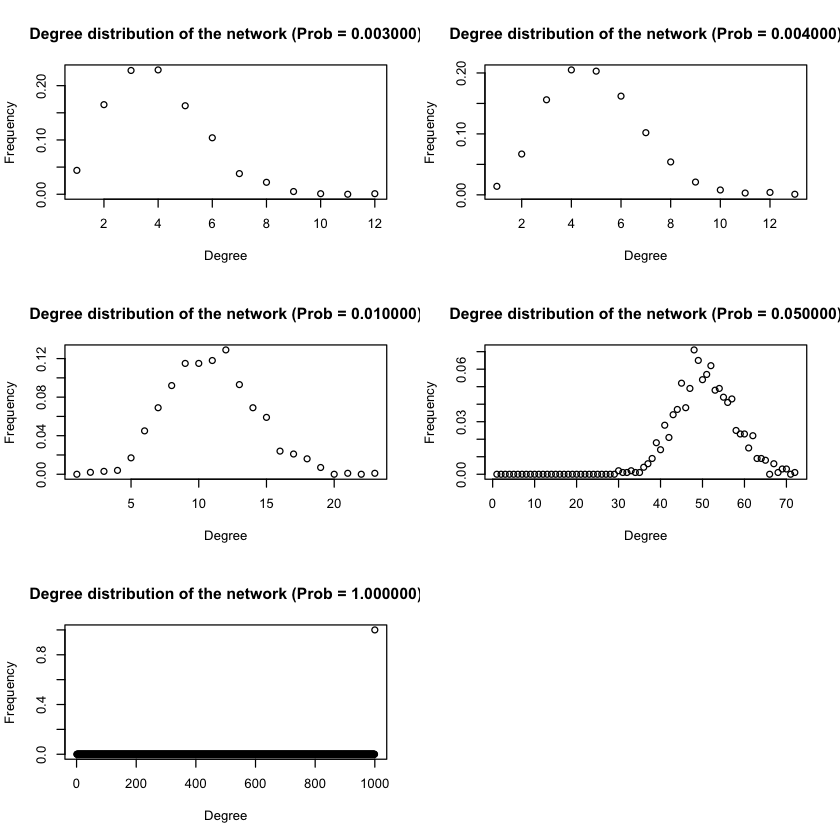

In [2]:
n <- 1000
prob <- c(0.003, 0.004, 0.01, 0.05, 1)

par(mfrow=c(3,2))
for (i in seq(1:5)) {
    # plot
    g <- random.graph.game(n, prob[i], directed = FALSE)
    title <- sprintf("Degree distribution of the network (Prob = %f)", prob[i])
    plot(degree.distribution(g), main = title, xlab = "Degree", ylab = "Frequency")
    
    # mean and variance
    deg <- degree(g)
    avgDegree <- mean(deg)
    variance <- var(deg)
    res <- sprintf("When prob is %f:The mean is %f and the variance is %f\n", prob[i], avgDegree, variance)
    cat(res)
}

(b) For each p and n = 1000, answer the following questions: Are all random realizations of the ER network connected? `Numerically estimate the probability that a generated network is connected.` For one instance of the networks with that p, find the giant connected component (GCC) if not connected. What is the diameter of the GCC?

In [3]:
prob <- c(0.003, 0.004, 0.01, 0.05, 1)
n <- 1000

for (i in seq(1:5)) {
    g <- erdos.renyi.game(n, prob[i], directed = FALSE)
    
    # isconnected
    if (is.connected(g)) {
        res <- sprintf("prob = %f, n = %d, graph is connected.\n", prob[i], n)
    } else {
        res <- sprintf("prob = %f, n = %d, graph is not connected.\n", prob[i], n)
        
        # Giant Connected Component
        g.components <- clusters(g)
        giant.idx <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == giant.idx))
        
        # diameter of GCC
        d <- diameter(g.giant)
        resD <- sprintf("The diameter of the GCC is %f. and contains %d nodes. ", d, g.components$csize[giant.idx])
        cat(resD)
    }
    cat(res)   
}

The diameter of the GCC is 12.000000. and contains 940 nodes. prob = 0.003000, n = 1000, graph is not connected.
The diameter of the GCC is 11.000000. and contains 979 nodes. prob = 0.004000, n = 1000, graph is not connected.
prob = 0.010000, n = 1000, graph is connected.
prob = 0.050000, n = 1000, graph is connected.
prob = 1.000000, n = 1000, graph is connected.


(c) It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of the total network size) is a highly non-linear function of p, with interesting properties occurring for values where p = O(lnn/n). For n = 1000, sweep over values of p in this region and create 100 random networks for each p. Then scatter plot the normalized GCC sizes vs p. `Empirically estimate the value of p where a giant connected component starts to emerge (define your criterion of “emergence”)? Do they match with theoretical values mentioned or derived in lectures?`

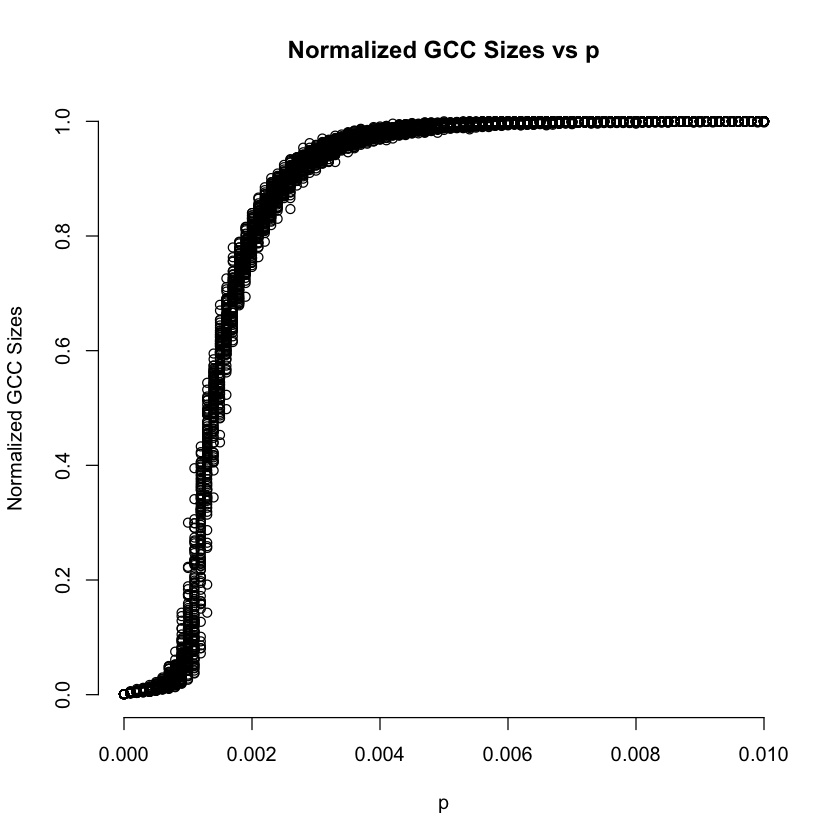

In [4]:
n <- 1000
prob <- seq(0, 0.01, 0.0001)
g.repeat <- 100

# plot frame
plot.new()
plot.window(xlim = c(0,0.01), ylim = c(0, 1))
axis(1)
axis(2)
title(main = "Normalized GCC Sizes vs p")
title(xlab = "p")
title(ylab = "Normalized GCC Sizes")

# scatter points
for (i in seq(1:length(prob))) {
    
    # for each value of prob, we generate a network with same parameters for 100 times 
    # to see the trend
     for (j in seq(1:g.repeat)) {
        g <- random.graph.game(n, prob[i], directed = FALSE)
        g.components <- clusters(g)
        giant.idx <- which.max(g.components$csize)
        gcc.size.normalized <- g.components$csize[giant.idx] / n
        points(prob[i], gcc.size.normalized)  
     }
}

(d) 
    
    i. Define the average degree of nodes c = np = 0.5. Sweep over number of nodes,n, ranging from 100 to 10000. Plot the expected size of the GCC of ER networks with n nodes and edge-formation probabilities p = c/n, as a function of n. What trend is observed?

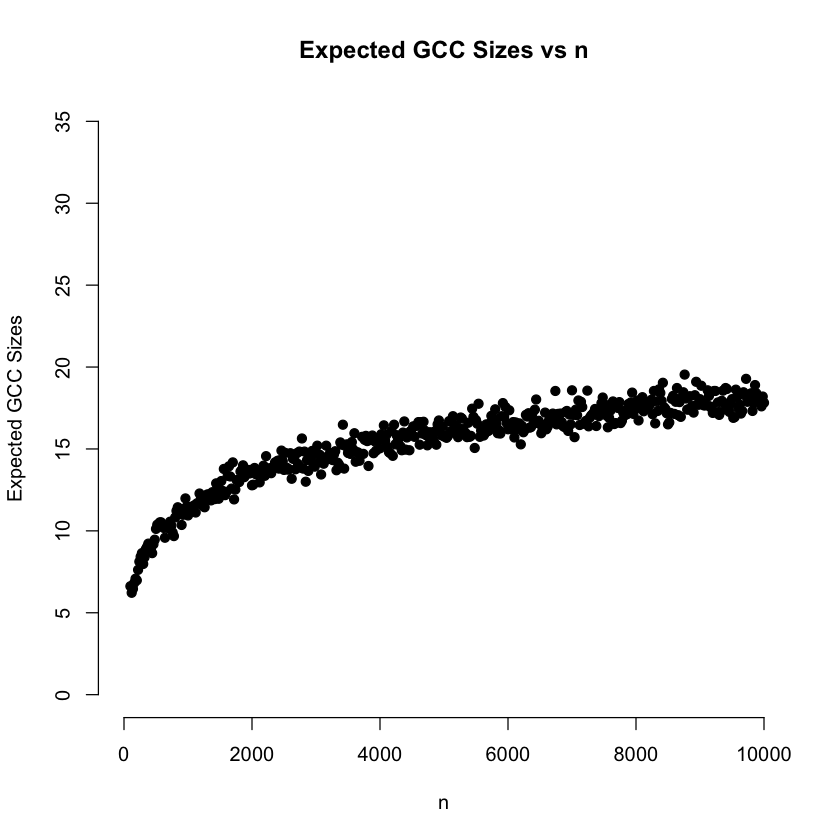

In [5]:
c <- 0.5
n <- seq(100, 10000, 20)
g.repeat <- 50

# plot frame
plot.new()
plot.window(xlim = c(0, 10000), ylim = c(0, 35))
axis(1)
axis(2)
title(main = "Expected GCC Sizes vs n")
title(xlab = "n")
title(ylab = "Expected GCC Sizes")

# scatter points
for(i in 1:length(n)){
    gcc.expected <- 0
    
    # for each value of n, we generate a network with same parameters 50 times
    # to calculate the expected gcc size of each network size n.
    for (j in 1:g.repeat) {
        g <- erdos.renyi.game(n[i], c / n[i], directed = FALSE)
        g.components <- clusters(g)
        giant.idx <- which.max(g.components$csize)
        gcc.size <- g.components$csize[giant.idx]
        gcc.expected <- gcc.expected + gcc.size
    }
    points(n[i], gcc.expected / g.repeat, pch = 19)
}

    ii. Repeat the same for c = 1.

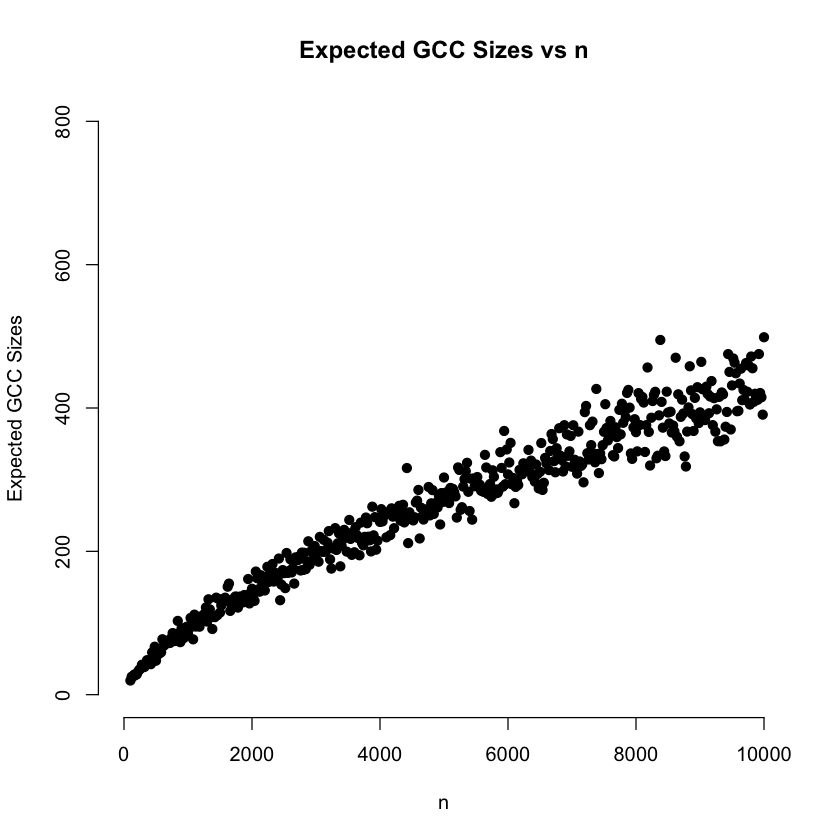

In [6]:
c <- 1
n <- seq(100, 10000, 20)
g.repeat <- 50

# plot frame
plot.new()
plot.window(xlim = c(0, 10000), ylim = c(0, 800))
axis(1)
axis(2)
title(main = "Expected GCC Sizes vs n")
title(xlab = "n")
title(ylab = "Expected GCC Sizes")

# scatter points
for(i in 1:length(n)){
    gcc.expected <- 0
    
    # for each value of n, we generate a network with same parameters 50 times
    # to calculate the expected gcc size of each network size n.
    for (j in 1:g.repeat) {
        g <- erdos.renyi.game(n[i], c / n[i], directed = FALSE)
        g.components <- clusters(g)
        giant.idx <- which.max(g.components$csize)
        gcc.size <- g.components$csize[giant.idx]
        gcc.expected <- gcc.expected + gcc.size
    }
    points(n[i], gcc.expected / g.repeat, pch = 19)
}

    iii. Repeat the same for values of c = 1.1, 1.2, 1.3, and show the results for these three values in a single plot.

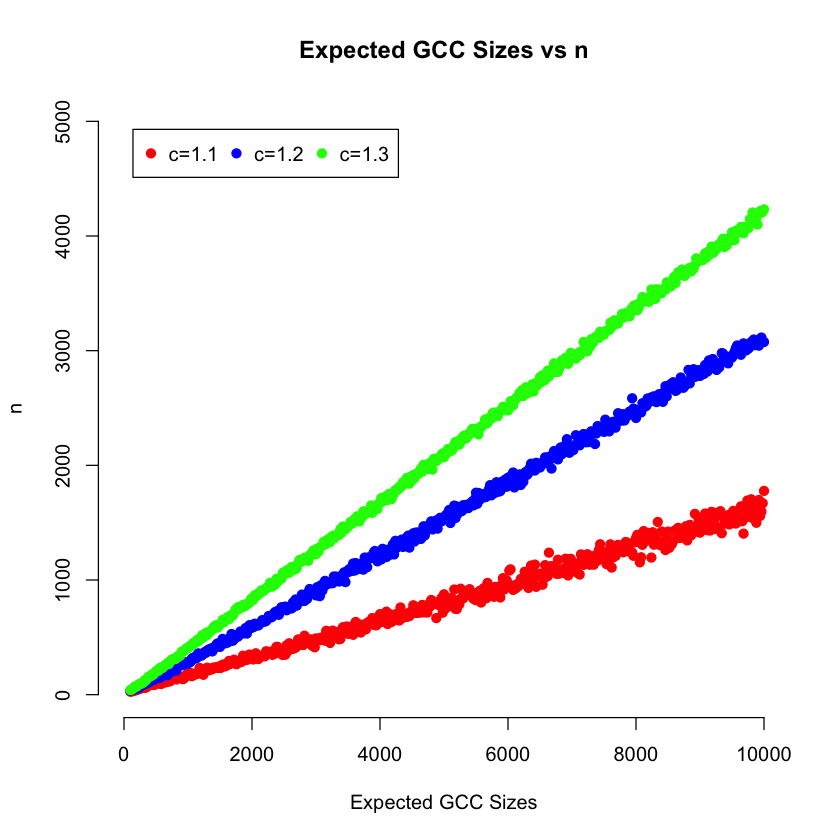

In [7]:
n <- seq(100, 10000, 20)
c <- c(1.1, 1.2, 1.3)
color <- c("red", "blue", "green")
g.repeat <- 50

# plot frame
plot.new()
plot.window(xlim = c(0,10000), ylim = c(0, 5000))
axis(1)
axis(2)
title(main = "Expected GCC Sizes vs n")
title(xlab = "Expected GCC Sizes")
title(ylab = "n")

for (k in seq(1,3)) {
    for (i in seq(1, length(n))) {
        gcc.expected = 0
        
        # for each value of n, we generate a network with same parameters 50 times
        # to calculate the expected gcc size of each network size n.        
        for (j in 1:g.repeat) {
            g <- erdos.renyi.game(n[i], c[k] / n[i], directed = FALSE)
            g.components <- clusters(g)
            giant.idx <- which.max(g.components$csize)
            gcc.size = g.components$csize[giant.idx]
            gcc.expected = gcc.expected + gcc.size
        }
        points(n[i], gcc.expected / g.repeat, col = color[k], pch = 19)            
    }
}
legend("topleft", inset=.05, legend=c("c=1.1", "c=1.2", "c=1.3"), col=c("red", "blue", "green"), pch=19, horiz=TRUE)

## 2. Create networks using preferential attachment model

(a) Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?

In [8]:
g <- barabasi.game(1000, m = 1, directed = FALSE)
if (is.connected(g)) {
    cat("Preferential attachment model network is always connected.\n")
} else {
    cat("Preferential attachment model network is not always connected.\n")
}


Preferential attachment model network is always connected.


(b) Use fast greedy method to find the community structure. Measure modularity.

The community size is  48 71 50 40 52 38 37 39 33 34 35 31 29 28 28 27 27 25 30 26 30 23 20 18 19 17 17 17 19 16 16 15 11 12 12 10 


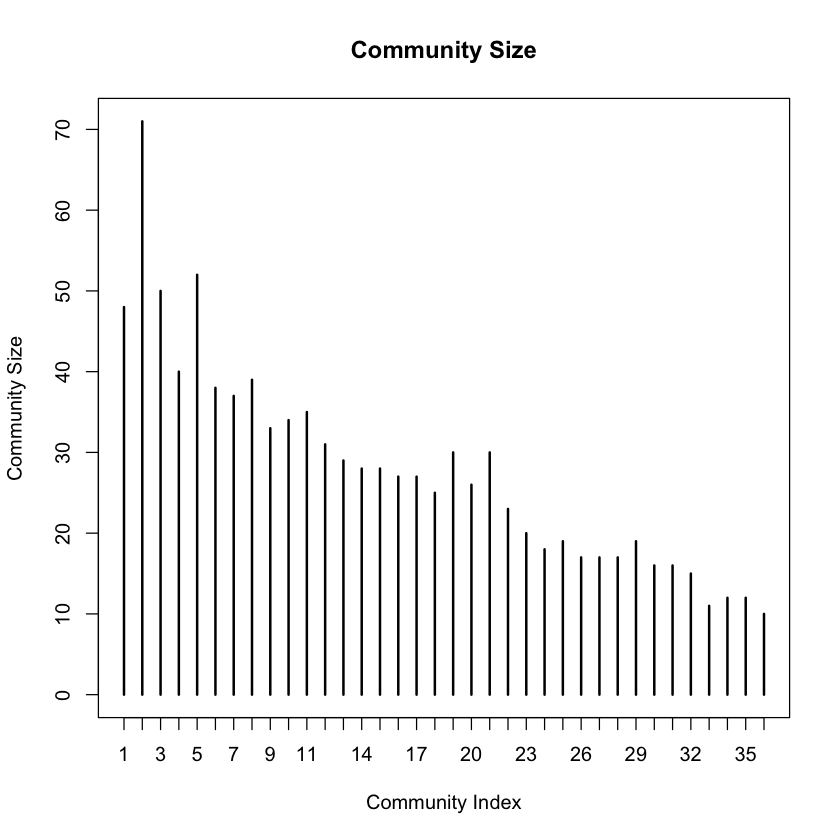

In [9]:
g <- barabasi.game(1000, m = 1, directed = FALSE)
g.fgc <- fastgreedy.community(g)
community.size <- sizes(g.fgc)
plot(community.size, xlab = "Community Index", ylab = "Community Size", main = "Community Size")
cat("The community size is ", community.size, "\n")

(c) Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?

The community size is  144 150 214 148 164 151 263 135 161 143 150 147 159 127 132 163 154 133 129 124 160 124 133 136 116 121 126 131 111 112 111 116 108 115 104 105 104 110 102 107 103 103 94 94 92 97 93 93 98 91 97 99 94 86 86 84 88 82 83 80 78 87 84 86 78 83 75 72 82 68 73 65 65 68 70 71 63 58 55 55 54 51 71 49 57 49 55 46 46 43 42 40 40 44 40 39 41 43 41 38 37 37 33 33 34 38 30 26 26 21 20 20 


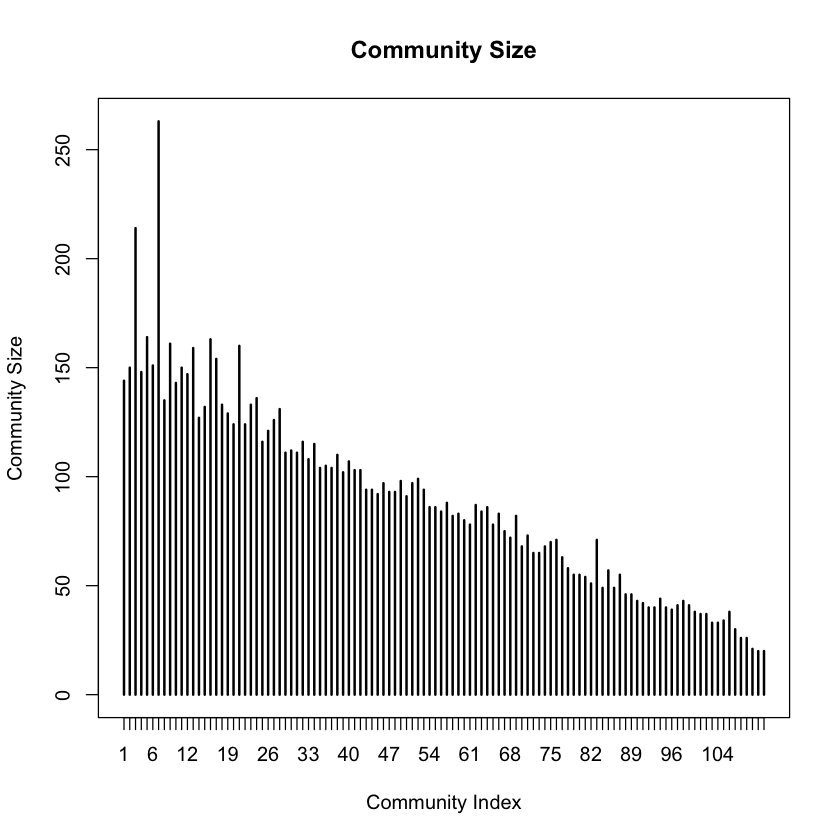

In [10]:
g <- barabasi.game(10000, m = 1, directed = FALSE)
g.fgc <- fastgreedy.community(g)
community.size <- sizes(g.fgc)
plot(community.size, xlab = "Community Index", ylab = "Community Size", main = "Community Size")
cat("The community size is ", community.size, "\n")

(d) Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot.

When n is 1000 , the slop is -2.385087

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“31 y values <= 0 omitted from logarithmic plot”

When n is 10000 , the slop is -3.069199

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“11 y values <= 0 omitted from logarithmic plot”

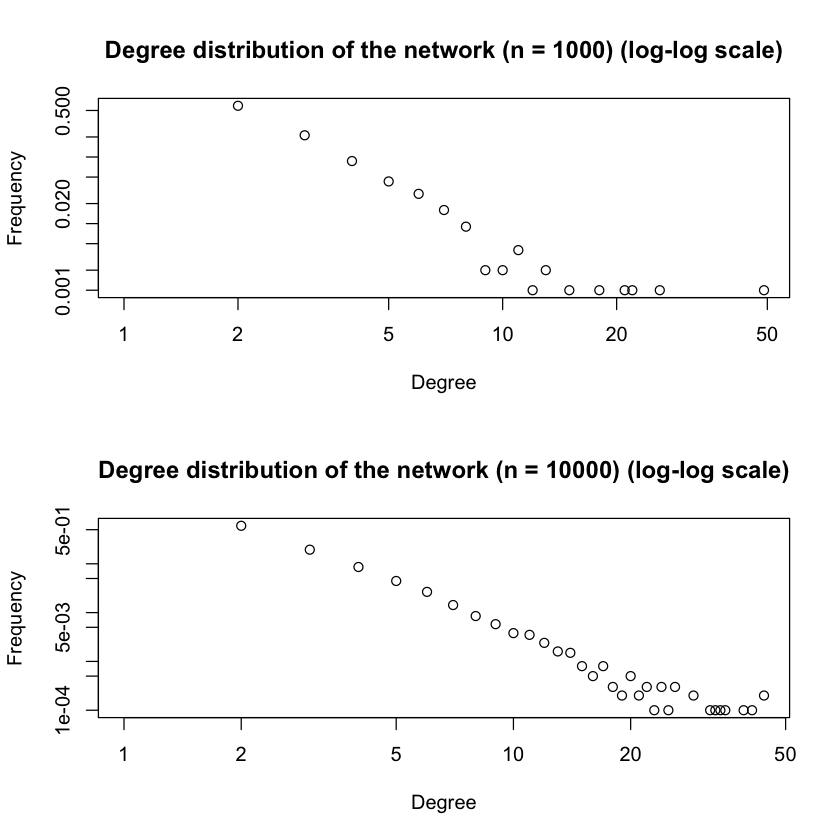

In [11]:
n <- c(1000, 10000)
par(mfrow=c(2,1))
for (i in 1:length(n)) {
    g <- barabasi.game(n[i], m = 1, directed = FALSE)
    title <- sprintf("Degree distribution of the network (n = %d) (log-log scale)", n[i])
    
    # linear regression -> slop
    degree.freq <- degree.distribution(g)
    degree = 1:length(degree.freq)
    df.log = log(degree.freq[degree.freq != 0])
    d.log = log(degree[degree.freq != 0])
    cat("When n is", n[i], ", the slop is", lm(df.log ~ d.log)$coefficients[2])
    
    # Plot
    plot(degree, degree.freq, main = title, xlab = "Degree", ylab = "Frequency", log = "xy")
}

(e) You can randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. How does this differ from the node degree distribution?

When n is 1000 , the slop is -1.089331

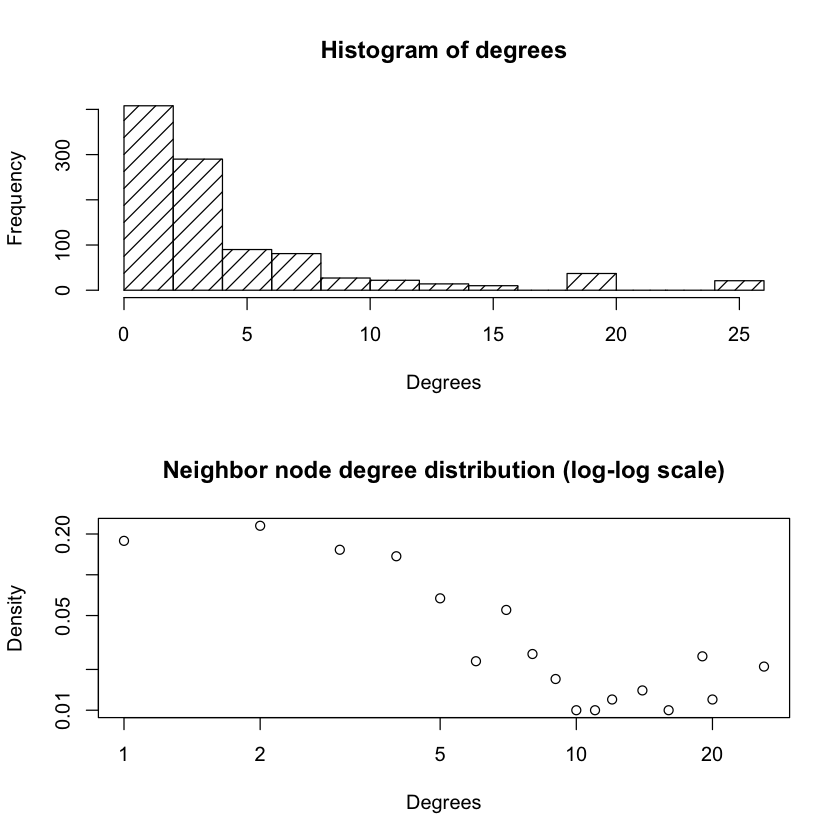

In [12]:
n <- 1000
g <- barabasi.game(n, m = 1, directed = FALSE)
degrees <- array(0, n)

# randomly pick a node i
for (i in 1:n) {
    node.rand <- sample(1:n, 1)
    
    #  randomly pick a neighbor j of that node
    node.neighbors <- neighbors(g, v = node.rand)
    if (length(node.neighbors) > 0) {
        neighbor.idx <- sample(1:length(node.neighbors), 1)
        degrees[i] <- degree(g, node.neighbors[neighbor.idx]) 
    }
}
par(mfrow = c(2,1))
hist(degrees, density = 10, xlab = "Degrees", ylab = "Frequency")

# get degree - frequency vectors
degree.freq.table <- as.data.frame(table(degrees))
degrees <- as.numeric(as.vector((degree.freq.table[[1]])))
freq <- degree.freq.table[[2]] / n

# linear regression -> slop
degrees.log <- log(degrees)
freq.log <- log(freq)
cat("When n is", n, ", the slop is", lm( freq.log ~ degrees.log)$coefficients[2])

plot(degrees, freq, log = "xy", xlab = "Degrees", ylab = "Density", main = "Neighbor node degree distribution (log-log scale)")

(f) Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

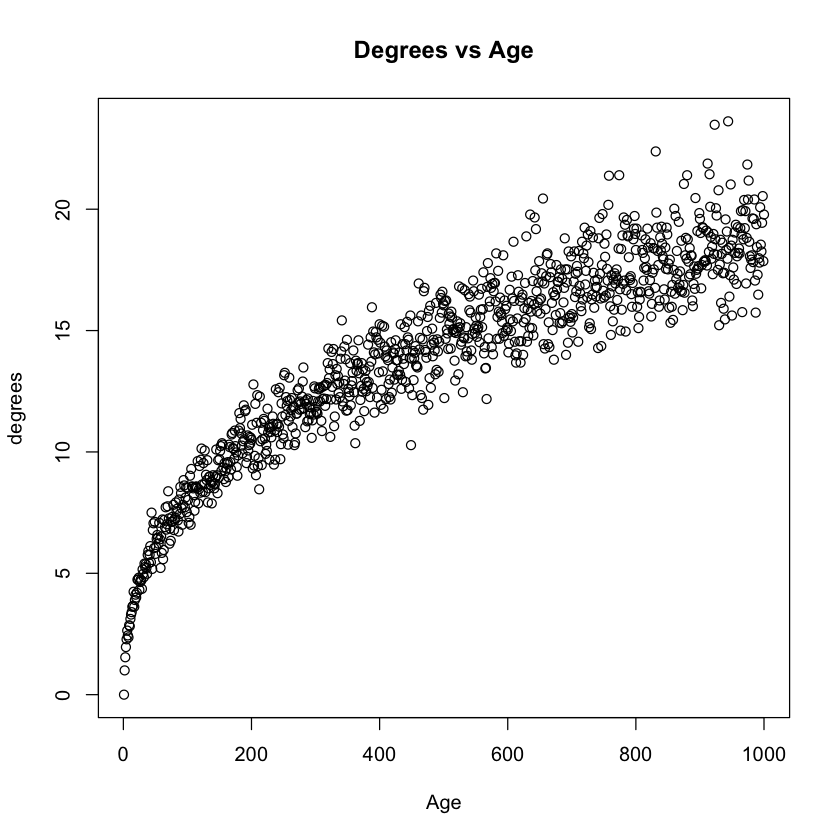

In [13]:
steps <- 1000
degrees <- array(0, steps)
g.repeat <- 50

for (i in 1:steps) {
    degree.mean = 0
    
    # For each steps, we generate a network with same parameters for 50 times
    # to find out the expected degrees of this step.
    for (j in 1:g.repeat) {
        g <- barabasi.game(i, m = 1, directed = FALSE)
        degree.mean <- degree.mean + degree(g, 1)  
    }
    degree.mean <- degree.mean / g.repeat
    degrees[i] <- degree.mean 
}
plot(degrees, xlab = "Age", ylab = "degrees", main = "Degrees vs Age")

(g) Repeat the previous parts for m = 2, and m = 5. Why was modularity for m = 1 high?

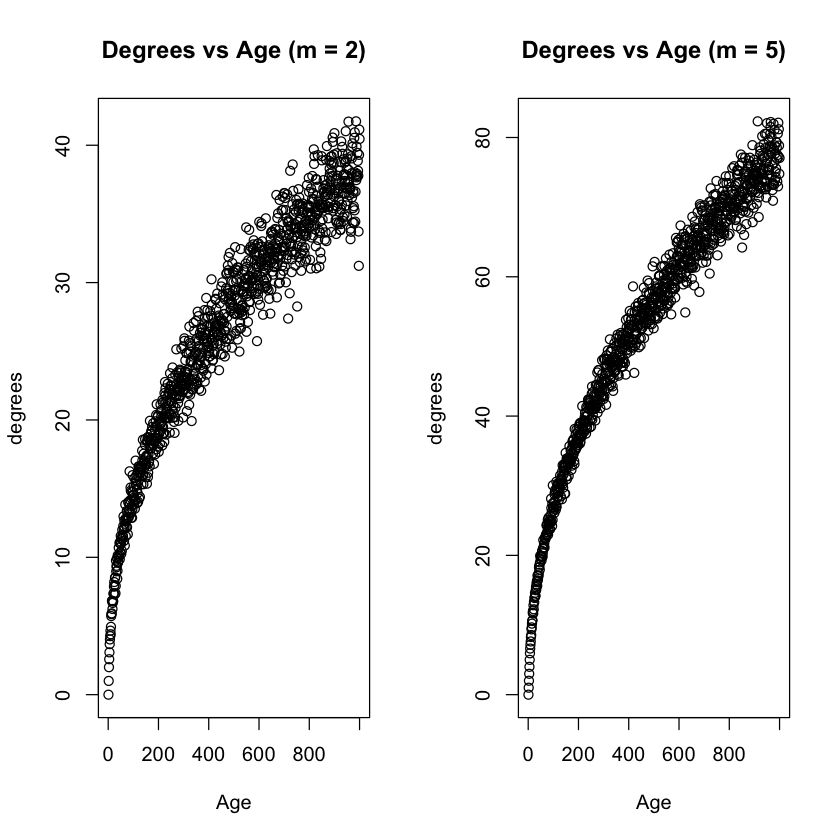

In [14]:
steps <- 1000
degrees <- array(0, steps)
g.repeat <- 50
par(mfrow = c(1, 2))
m = c(2, 5)
for (i in 1:2) {
    for (j in 1:steps) {
        degree.mean = 0
        
        # For each steps, we generate a network with same parameters for 50 times
        # to find out the expected degrees of this step.
        for (k in 1:g.repeat) {
            g <- barabasi.game(j, m = m[i] , directed = FALSE)
            degree.mean <- degree.mean + degree(g, 1)    
        }
        degree.mean <- degree.mean / g.repeat
        degrees[j] <- degree.mean
    }    
    title = sprintf("Degrees vs Age (m = %d)", m[i])
    plot(degrees, xlab = "Age", ylab = "degrees", main = title)
}



(h) Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.

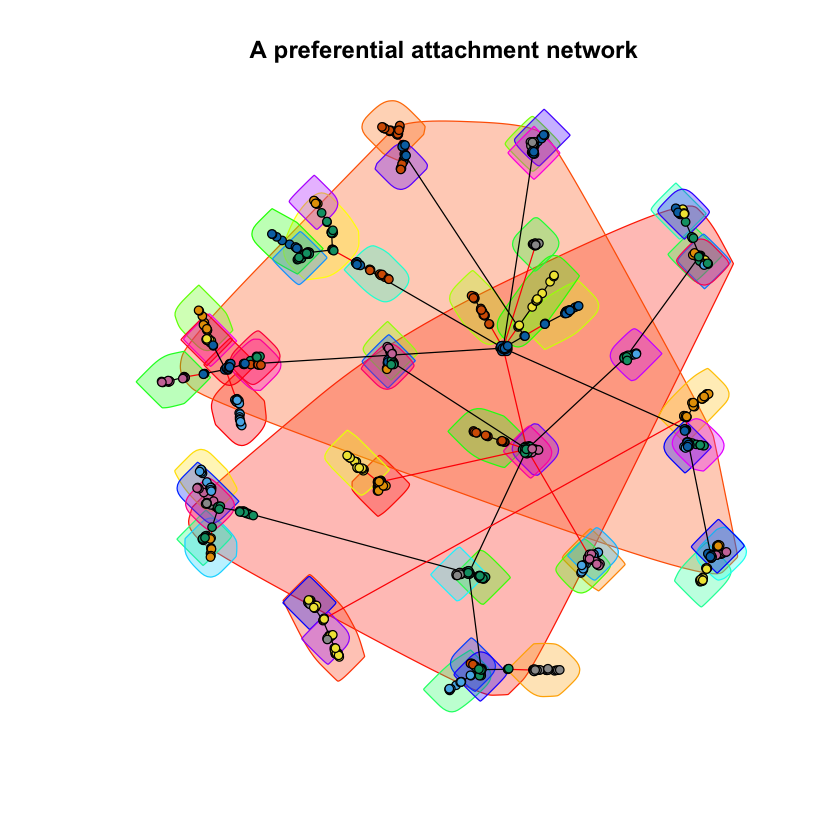

The community size of the network is  43 52 40 39 58 38 38 38 32 31 35 51 32 31 36 24 23 23 26 23 23 21 21 21 20 20 22 19 17 16 16 16 15 13 15 12 
The community size of the new network is  40 38 38 36 38 37 40 55 34 30 50 25 48 27 27 23 26 37 24 26 24 11 7 6 5 5 5 5 4 6 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 


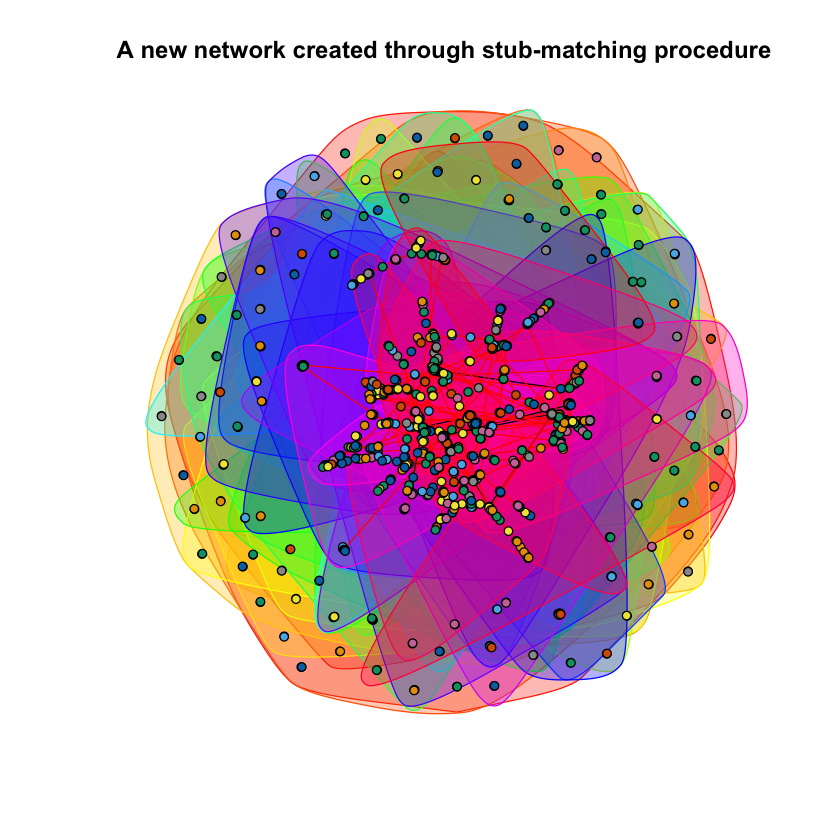

In [15]:
n <- 1000
g <- barabasi.game(n, m = 1, directed = FALSE)
degrees <- degree(g)
g.new <- sample_degseq(degrees, method = "simple.no.multiple")
community <- walktrap.community(g)
# community.new <- walktrap.community(g.new)
# par(mfrow = c(2,1))
plot(community, g, vertex.label = NA, vertex.size = 3, main = "A preferential attachment network")
plot(community, g.new, vertex.label = NA, vertex.size = 3, main = "A new network created through stub-matching procedure")

g.fgc <- fastgreedy.community(g)
community.size <- sizes(g.fgc)
cat("The community size of the network is ", community.size, "\n")

g.fgc.new <- fastgreedy.community(g.new)
community.size.new <- sizes(g.fgc.new)
cat("The community size of the new network is ", community.size.new, "\n")

## 3. Create a modified preferential attachment model that penalizes the age of a node

(a) Each time a new vertex is added, it creates $m$ links to old vertices and the probability that an old vertex is cited depends on its degree (preferential attachment) and age. In particular, the probability that a newly added vertex connects to an old vertex is proportional to:$$P[i]\sim(ck_i^\alpha+a)(dl_i^\beta+b)$$ where $k_i$ is the degree of vertex $i$ in the current time step, and $l_i$ is the age of vertex $i$. Produce such an undirected network with 1000 nodes and parameters $m = 1$, $\alpha = 1$, $\beta =  1$, and $a = c = d = 1,b = 0$. Plot the degree distribution. What is the power law exponent?

##### aging.barabasi.game(...) parameters
>c - deg.coef (c, optional, the default is 1)

>alpha - pa.exp (alpha, mandatory argument)

>a - zero.deg.appeal (a, optional, the default value is 1)

>d - age.coef (d, optional, the default is 1)

>beta - aging.exp (beta, mandatory argument)

>b - zero.age.appeal (b, optional, the default is 0)

Warning message in aging.barabasi.game(n, m = 1, deg.coef = 1, pa.exp = 1, zero.deg.appeal = 1, :
“aging exponent is positive”

The power law exponent is 1.466712 


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“106 y values <= 0 omitted from logarithmic plot”

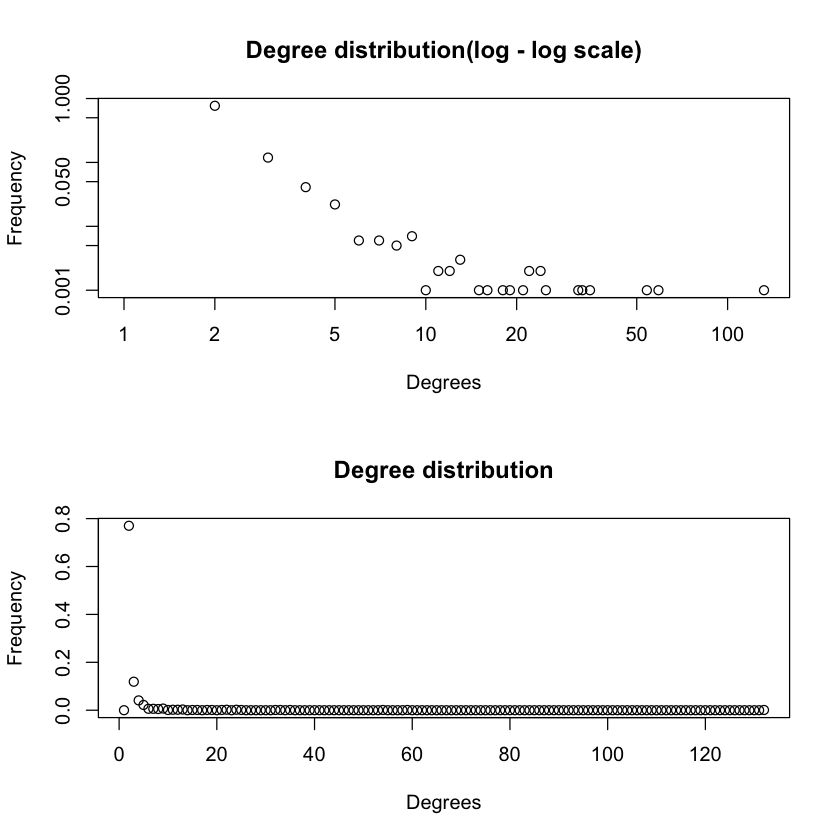

In [16]:
n <- 1000
g <- aging.barabasi.game(n, m = 1, deg.coef = 1, pa.exp = 1, zero.deg.appeal = 1, age.coef = 1, aging.exp = 1, zero.age.appeal = 0, directed = FALSE)
# g <- aging.prefatt.game(n, m = 1, deg.coef = 1, pa.exp = 1, zero.deg.appeal = 1, age.coef = 1, aging.exp = 1, zero.age.appeal = 0, directed = FALSE)
degrees.freq <- degree.distribution(g)

# linear regression -> slope
degrees <- 1:length(degrees.freq)
degrees.freq.log <- log(degrees.freq[degrees.freq != 0])
degrees.log <- log(degrees[degrees.freq != 0]) 
cat("The power law exponent is", -lm(degrees.freq.log ~ degrees.log)$coefficients[2], "\n")

par(mfrow = c(2, 1))
plot(degrees.freq, log = "xy", xlab = "Degrees", ylab = "Frequency", main = "Degree distribution(log - log scale)")
plot(degrees.freq, xlab = "Degrees", ylab = "Frequency", main = "Degree distribution")

(b) Use fast greedy method to find the community structure. What is the modularity?

Warning message in aging.barabasi.game(n, m = 1, deg.coef = 1, pa.exp = 1, zero.deg.appeal = 1, :
“aging exponent is positive”

The community size is  92 64 123 82 62 53 33 39 35 25 24 25 29 26 26 20 22 25 21 23 17 13 14 25 12 9 10 11 9 6 5 5 9 6 


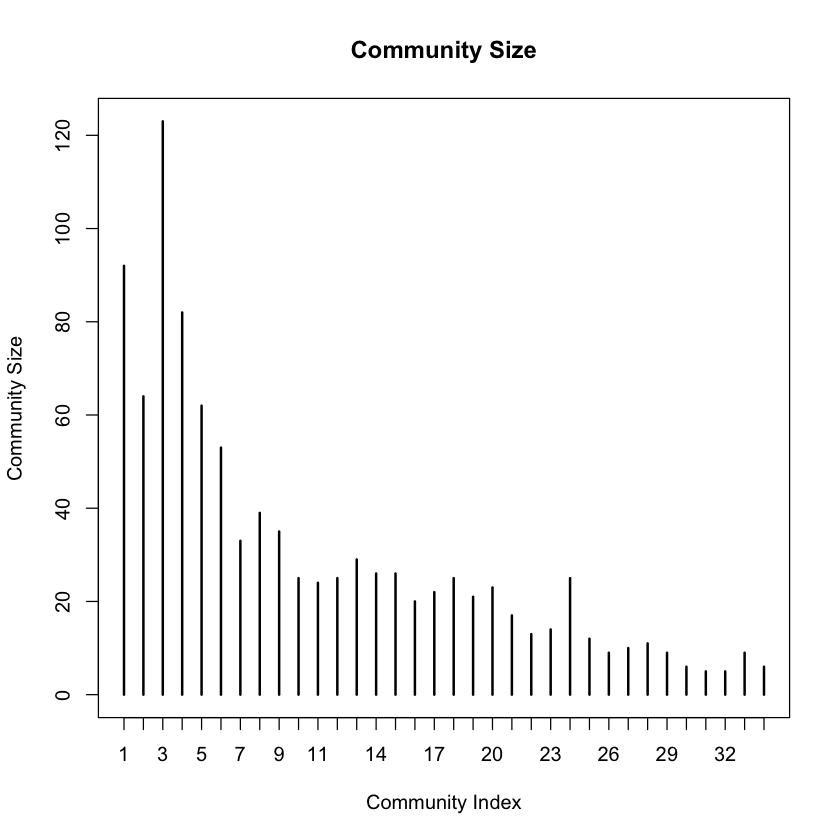

In [17]:
n <- 1000
g <- aging.barabasi.game(n, m = 1, deg.coef = 1, pa.exp = 1, zero.deg.appeal = 1, age.coef = 1, aging.exp = 1, zero.age.appeal = 0, directed = FALSE)
g.fgc <- fastgreedy.community(g)
community.size <- sizes(g.fgc)
plot(community.size, xlab = "Community Index", ylab = "Community Size", main = "Community Size")
cat("The community size is ", community.size, "\n")